## Обработка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
# %config InlineBackend.figure_format = 'svg'

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
import warnings
warnings.simplefilter('ignore')

In [5]:
def permutation_importance(X_valid, y_valid, model, base_score):
    """
    Function returns sorted list of most importand features of model from most usefull to less
    X_valid, y_valid - test parts of dataset
    model - trained model
    base_score - r2 score on training parts
    """
    result = []
    for feature in X_valid.columns:
        X = X_valid.copy()
        X[feature] = np.random.permutation(X[feature])
        score_diff = r2_score(y_valid, model.predict(X)) - base_score
        if score_diff > 0:
            result.append((feature, score_diff, 'useless'))
        else:
            result.append((feature, score_diff, 'usefull'))
    result.sort(key=lambda x: x[1])
    return result

In [6]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
    Stolen from teacher function, which shows scatter plot of train predictions vs test predictions
    """
    print("Train R2:\t" + str(round(r2_score(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2_score(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [7]:
TRAIN_DATASET = './data/train.csv'
TEST_DATASET = './data/test.csv'

Описание датасета test.csv:
* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры

In [8]:
df = pd.read_csv(TRAIN_DATASET)
df_test = pd.read_csv(TEST_DATASET)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


Оцениваем размер датасета

In [9]:
df.shape

(10000, 20)

Смотрим информацию по датафрейму

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Переименовываем столбец с ошибкой

In [11]:
df.rename(columns={'Helthcare_2': 'Healthcare_2'}, inplace=True)

Удаляем столбец ID, так как он не несет смысловой нагрузки

In [12]:
del df['Id']

In [13]:
del df_test['Id']

Оцениваем целевую переменную

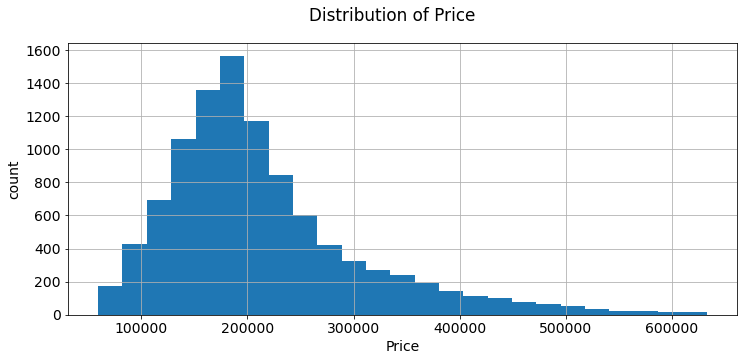

In [14]:
plt.figure(figsize = (12, 5))

plt.plot()
df['Price'].hist(bins=25)
plt.ylabel('count')
plt.xlabel('Price')


plt.suptitle('Distribution of Price')
plt.show()

In [15]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()

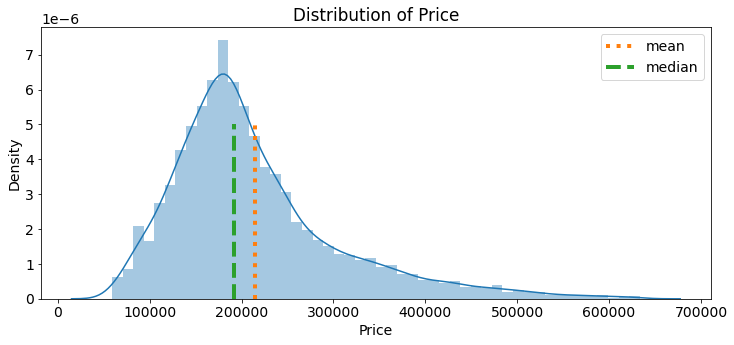

In [16]:
plt.figure(figsize = (12, 5))
sns.distplot(df['Price'])
y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

## Обработка данных

Смотрим на нечисловые столбцы

In [17]:
df.select_dtypes(include='object')

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B
...,...,...,...
9995,B,B,B
9996,B,B,A
9997,B,B,A
9998,B,A,B


Так как в этих столбцах у нас только 2 категории, переводим их в 0 и 1

In [18]:
df['Ecology_2'] = np.where(df['Ecology_2'] == 'A', 1, 0)
df['Ecology_3'] = np.where(df['Ecology_3'] == 'A', 1, 0)
df['Shops_2'] = np.where(df['Shops_2'] == 'A', 1, 0)

In [19]:
# Повторяем для тестовой выборки
df_test['Ecology_2'] = np.where(df_test['Ecology_2'] == 'A', 1, 0)
df_test['Ecology_3'] = np.where(df_test['Ecology_3'] == 'A', 1, 0)
df_test['Shops_2'] = np.where(df_test['Shops_2'] == 'A', 1, 0)

In [20]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.009700,0.027500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.082500,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,0.000000,0.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,0.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [21]:
cross = pd.Series(list(set(df.DistrictId.values) ^ set(df_test.DistrictId.values)))
df_test.loc[df_test.DistrictId.isin(cross), 'DistrictId'] = 209

In [22]:
cross = pd.Series(list(set(df.Rooms.values) ^ set(df_test.Rooms.values)))
cross

0    10.0
1    17.0
2    19.0
dtype: float64

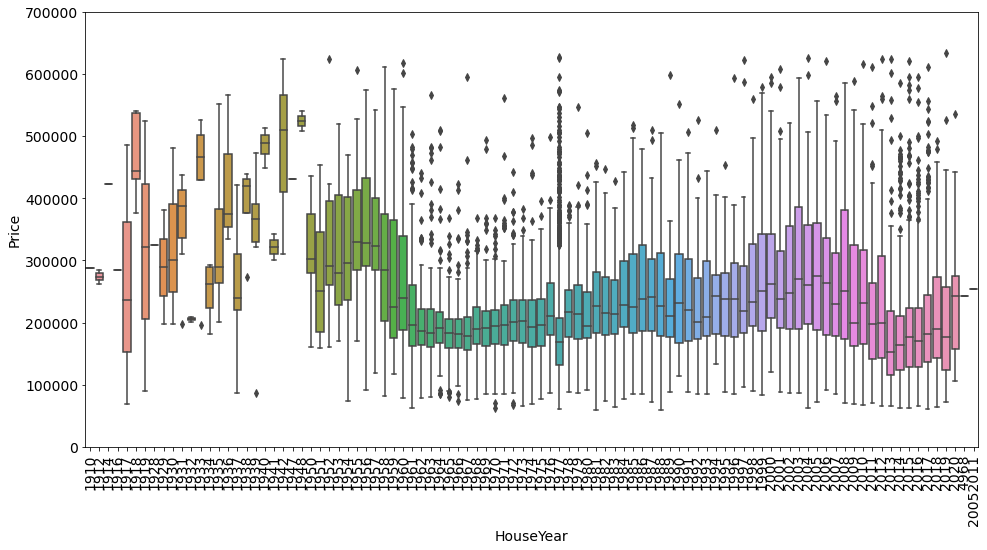

In [23]:
var = 'HouseYear'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=700000);
plt.xticks(rotation=90);

Особой зависимости цены от года постройки дома пока не наблюдаем, но видим пару выбросов

Чистим выбросы

In [24]:
df[df.HouseYear > 2020]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
1497,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,0,0,30,6141,10,262.0,3,6,0,254084.534396
4189,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,0,0,25,4756,16,2857.0,5,8,0,243028.603096


In [25]:
df.loc[df.HouseYear == 4968, 'HouseYear'] = 1968
df.loc[df.HouseYear == 20052011, 'HouseYear'] = 2005

Если этаж квартиры больше этажей в доме - приравниваем к числу этажей в доме

In [26]:
df[df.Floor > df.HouseFloor]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
7,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,0,0,6,1437,3,NaN,0,2,0,221244.156664
14,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,0,0,2,629,1,NaN,0,0,1,140647.565937
16,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,0,0,5,1227,0,NaN,0,0,0,117000.381287
21,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,0,0,9,1892,0,NaN,0,1,0,127200.026511
23,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,0,0,30,5285,0,645.0,6,6,0,571069.052600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,52,3.0,64.074977,47.633428,6.0,11,9.0,1983,0.371149,0,0,34,7065,1,750.0,2,5,0,226434.880156
9985,27,1.0,38.968338,NaN,1.0,10,1.0,1977,0.211401,0,0,9,1892,0,NaN,0,1,0,95529.569405
9989,96,3.0,90.055233,47.860231,11.0,26,24.0,2005,0.041116,0,0,53,14892,4,NaN,1,4,0,441108.911237
9991,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,0,0,37,5288,0,1937.0,3,2,0,212883.501504


In [27]:
df.loc[df.Floor > df.HouseFloor, 'Floor'] = df.HouseFloor

In [28]:
df_test.loc[df_test.Floor > df_test.HouseFloor, 'Floor'] = df_test.HouseFloor

Убираем выбросы приравнивая к медиане:

In [29]:
df.loc[df['Rooms'] >= 10, 'Rooms'] = df['Rooms'].median()
df.loc[df['LifeSquare'] > 700, 'LifeSquare'] = df['LifeSquare'].median()
df.loc[df.KitchenSquare > 100, 'KitchenSquare'] = df['KitchenSquare'].median()
df.loc[df.HouseFloor > 90, 'HouseFloor'] = df['HouseFloor'].median()

In [30]:
df_test.loc[df_test['Rooms'] >= 10, 'Rooms'] = df_test['Rooms'].median()
df_test.loc[df_test['LifeSquare'] > 700, 'LifeSquare'] = df_test['LifeSquare'].median()
df_test.loc[df_test.KitchenSquare > 100, 'KitchenSquare'] = df_test['KitchenSquare'].median()
df_test.loc[df_test.HouseFloor > 90, 'HouseFloor'] = df_test['HouseFloor'].median()

Выкидываем строки с площадью больше 400

In [31]:
df.drop(df[df.Square > 400].index, inplace=True)

Путем экспериментов было выяснено, что KNN импутация, подбор значений в зависимости от Square/KitchenSquare или использование регрессионной модели особого значения для финальной модели не имеет.
Поэтому просто приравниваем null значения LifeSquare медиане

In [32]:
df.loc[df.LifeSquare.isnull(), 'LifeSquare'] = df['LifeSquare'].median()

In [33]:
df_test.loc[df_test.LifeSquare.isnull(), 'LifeSquare'] = df_test['LifeSquare'].median()

Применив случайный лес, восстановим значения Healthcare_1

In [34]:
df_hc = df[df.Healthcare_1.notna()]
df_hc_target = df_hc['Healthcare_1']
df_hc.drop('Healthcare_1', axis=1, inplace=True)
df_hc.drop('Price', axis=1, inplace=True) # Так как в тестовых данных нет столбца Price, для обучения модели исключаем и из тренировочного
X_hc_train, X_hc_valid, y_hc_train, y_hc_valid = train_test_split(df_hc, df_hc_target, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_hc_train, y_hc_train)
rf_pr = rf_model.predict(X_hc_valid)
r2_score(y_hc_valid, rf_pr)

0.9937367564721904

Получаем достаточно неплохое качество модели

In [35]:
df.loc[df.Healthcare_1.isnull(), 'Healthcare_1'] = rf_model.predict(df[df.Healthcare_1.isnull()].
                                                                    drop(['Healthcare_1', 'Price'], axis=1))

In [36]:
df_test.loc[df_test.Healthcare_1.isnull(), 'Healthcare_1'] = rf_model.predict(df_test[df_test.Healthcare_1.isnull()].
                                                                    drop('Healthcare_1', axis=1))

Смотрим остались ли пропущенные строки

In [37]:
df.isnull().any()

DistrictId       False
Rooms            False
Square           False
LifeSquare       False
KitchenSquare    False
Floor            False
HouseFloor       False
HouseYear        False
Ecology_1        False
Ecology_2        False
Ecology_3        False
Social_1         False
Social_2         False
Social_3         False
Healthcare_1     False
Healthcare_2     False
Shops_1          False
Shops_2          False
Price            False
dtype: bool

Смотрим матрицу корреляций

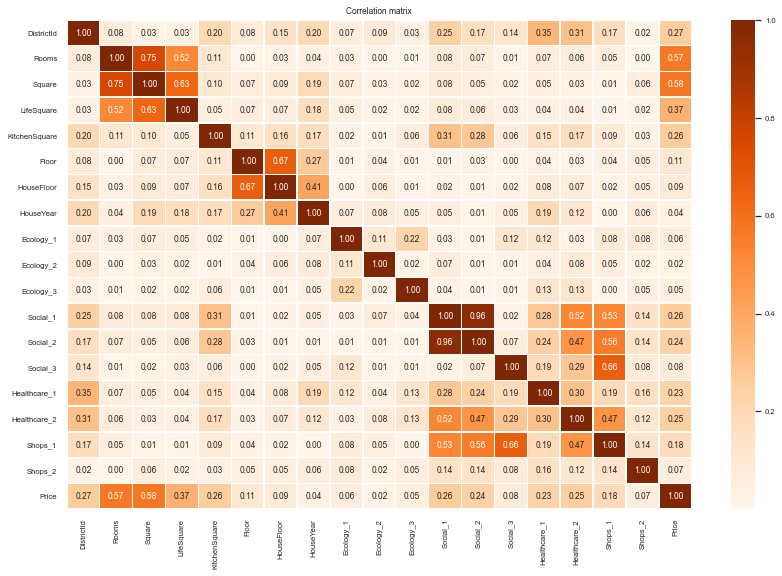

In [38]:
plt.figure(figsize = (14,9))

sns.set(font_scale=0.7)
sns.heatmap(abs(df.corr()), fmt='.2f', annot=True, linewidths=.5, cmap='Oranges')

plt.title('Correlation matrix')
plt.show()

Видим почти полную линейную зависимость Social_1 и Social_2. Удаляем лишний столбец

In [39]:
df.drop('Social_2', axis=1, inplace=True)

## Создание новых признаков

Средний возраст домов по районам

In [40]:
gp = df.groupby(['DistrictId'])['HouseYear'].mean()
df['district_mean_year'] = df['DistrictId'].map(gp.to_dict())

df_test['district_mean_year'] = df_test['DistrictId'].map(gp.to_dict())

Нормализованная сумма эко признаков по районам

In [41]:
df['ecology_sum'] = np.log(1 + df['Ecology_1']) + np.log(1 + df['Ecology_2']) + np.log(1 + df['Ecology_3'])
gp = df.groupby(['DistrictId'])['ecology_sum'].mean()
df['district_ecology'] = df['DistrictId'].map(gp.to_dict())
df.drop('ecology_sum', axis=1, inplace=True)

df_test['district_ecology'] = df_test['DistrictId'].map(gp.to_dict())

Медиана цены по районам

In [42]:
med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'med_price_by_district'})
df = df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')

df_test = df_test.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')

Средняя площадь сгруппированная по количеству комнат и разница имеющейся площади с этим признаком

In [43]:
gp = df.groupby(["Rooms"])["Square"].mean()
df["Mean_Square_by_rooms"] = df["Rooms"].map(gp.to_dict())
df["diff_square_and_mean_square_by_rooms"] = df["Square"] - df["Mean_Square_by_rooms"]

df_test["Mean_Square_by_rooms"] = df_test["Rooms"].map(gp.to_dict())
df_test["diff_square_and_mean_square_by_rooms"] = df_test["Square"] - df_test["Mean_Square_by_rooms"]

Разница площади и жилой площади

In [44]:
df['diff_square_lifesquare'] = df["Square"] - df["LifeSquare"]

df_test['diff_square_lifesquare'] = df_test["Square"] - df_test["LifeSquare"]

Медиана цены на старое жилье относительно районов

In [45]:
df['old_house'] = np.where(df['HouseYear'] < 1970, 1, 0)
med_price_by_district_old = df.groupby(['DistrictId', 'old_house'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'med_price_old'})

df = df.merge(med_price_by_district_old, on=['DistrictId', 'old_house'], how='left')

df_test['old_house'] = np.where(df_test['HouseYear'] < 1970, 1, 0)
df_test = df_test.merge(med_price_by_district_old, on=['DistrictId', 'old_house'], how='left')

In [46]:
df_test.loc[df_test.med_price_by_district.isnull(), 'med_price_by_district'] = df_test['med_price_by_district'].median()
df_test.loc[df_test.med_price_old.isnull(), 'med_price_old'] = df_test['med_price_old'].median()

## Отбор признаков и обучение модели

Путем многократного выполнения цикла тренировка/валидация модели выяснили что наиболее важные признаки следующие:

In [47]:
col = [
 'med_price_by_district',
 'med_price_old',
 'diff_square_and_mean_square_by_rooms',
 'Square',
 'Rooms',
 'HouseYear',
 'district_mean_year',
 'LifeSquare',
 'KitchenSquare',
 'diff_square_lifesquare',
 'Ecology_1',
 'district_ecology',
 'HouseFloor',
 'Social_3',
 'Healthcare_1',
 'DistrictId',
 'Social_1',
 'Floor',
 'Price'
]

Кроме того, на результирующем графике видим, что модели сложнее всего обучаться на объектах с ценой ниже 100000

In [48]:
df_no_cheap = df[df.Price > 100000][col]

In [49]:
X = df_no_cheap
Y = df_no_cheap['Price']
X = X.drop('Price', axis = 1)

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

In [51]:
gbr = GradientBoostingRegressor(n_estimators=840, 
                                max_depth=3, 
                                learning_rate=0.1, 
                                min_samples_split=3, 
                                max_features=5, 
                                random_state=42, 
                                min_samples_leaf=5)

In [52]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_features=5, min_samples_leaf=5,
                          min_samples_split=3, n_estimators=840,
                          random_state=42)

In [53]:
predict_y_gbr_train = gbr.predict(X_train)
base_score = r2_score(y_train, predict_y_gbr_train)

In [54]:
predict_y_gbr_valid = gbr.predict(X_valid)
r2_score(y_valid, predict_y_gbr_valid)

0.8262765314176909

Train R2:	0.914
Test R2:	0.826


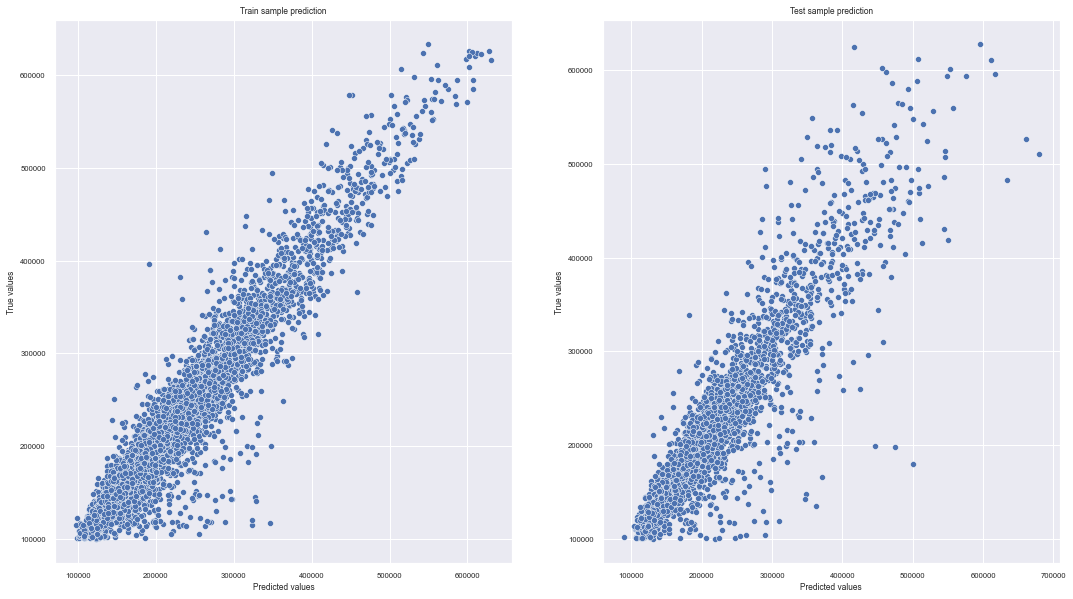

In [55]:
evaluate_preds(y_train, predict_y_gbr_train, y_valid, predict_y_gbr_valid)

Обучили модель градиентного бустинга на датасете с ценой более 100000. Применим на полном тренировочном датасете

In [56]:
X = df[col]
Y = df['Price']
X = X.drop('Price', axis = 1)

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

In [58]:
predict_y_gbr_train = gbr.predict(X_train)
base_score = r2_score(y_train, predict_y_gbr_train)

In [59]:
predict_y_gbr_valid = gbr.predict(X_valid)
r2_score(y_valid, predict_y_gbr_valid)

0.8362144646806043

Train R2:	0.835
Test R2:	0.836


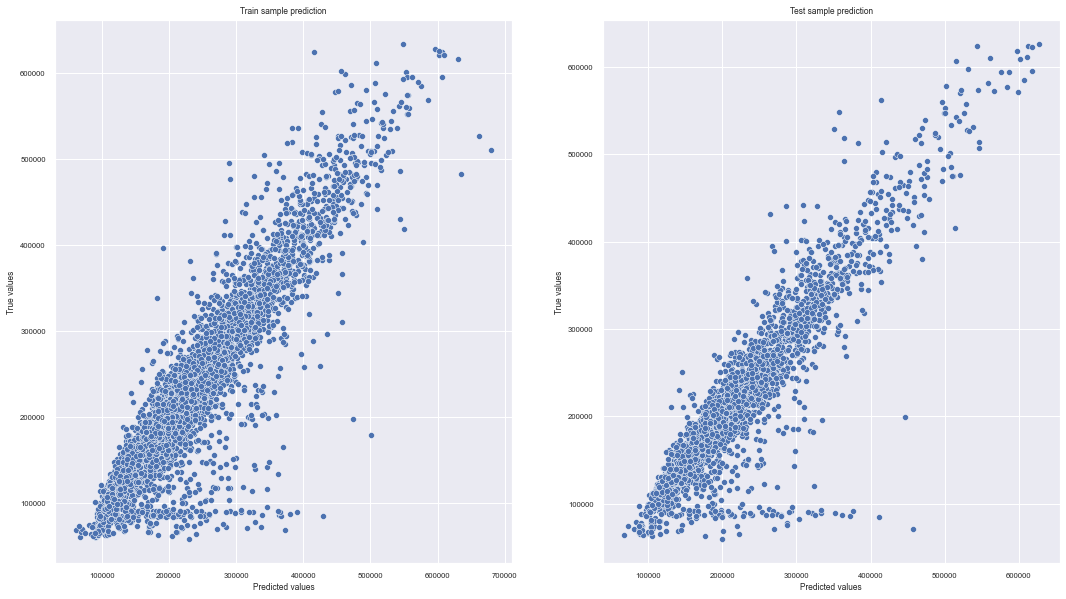

In [60]:
evaluate_preds(y_train, predict_y_gbr_train, y_valid, predict_y_gbr_valid)

Можем посмотреть важность признаков в порядке убывания

In [61]:
lst = permutation_importance(X_valid, y_valid, gbr, base_score)
lst

[('med_price_by_district', -0.23039285347092942, 'usefull'),
 ('Square', -0.09041595351581022, 'usefull'),
 ('med_price_old', -0.07603801695525825, 'usefull'),
 ('diff_square_and_mean_square_by_rooms', -0.07368029914628771, 'usefull'),
 ('HouseYear', -0.03364975898611222, 'usefull'),
 ('district_mean_year', -0.02353401992494375, 'usefull'),
 ('Social_1', -0.018849567027658942, 'usefull'),
 ('HouseFloor', -0.017812890238280588, 'usefull'),
 ('LifeSquare', -0.016556167487099094, 'usefull'),
 ('Ecology_1', -0.015659264577005172, 'usefull'),
 ('Social_3', -0.014062104490465188, 'usefull'),
 ('Healthcare_1', -0.013450326232509302, 'usefull'),
 ('diff_square_lifesquare', -0.013188954723533097, 'usefull'),
 ('KitchenSquare', -0.01301752766590647, 'usefull'),
 ('district_ecology', -0.012715414516808798, 'usefull'),
 ('Rooms', -0.011855598682511514, 'usefull'),
 ('DistrictId', -0.008126332975617379, 'usefull'),
 ('Floor', -0.007935624631104976, 'usefull')]

## Предскажем цены в тестовом датасете

In [62]:
col1 =[
 'med_price_by_district',
 'med_price_old',
 'diff_square_and_mean_square_by_rooms',
 'Square',
 'Rooms',
 'HouseYear',
 'district_mean_year',
 'LifeSquare',
 'KitchenSquare',
 'diff_square_lifesquare',
 'Ecology_1',
 'district_ecology',
 'HouseFloor',
 'Social_3',
 'Healthcare_1',
 'DistrictId',
 'Social_1',
 'Floor'
]

In [63]:
predict_y_gbr_test = gbr.predict(df_test[col1])

In [64]:
result = pd.DataFrame(predict_y_gbr_test, columns=['Price'])
df_t = pd.read_csv(TEST_DATASET)
final_result = pd.concat([df_t['Id'], result],axis=1).rename(columns={0:'Price'})

In [67]:
final_result

,Id,Price
0,725,149667.859670
1,15856,222426.695729
2,5480,367228.982370
3,15664,352628.404830
4,14275,146830.217836
...,...,...
4995,8180,240910.483995
4996,4695,131919.734860
4997,5783,319886.294458
4998,4780,170844.739285


In [68]:
final_result.to_csv('AChernyshev_predictions.csv',index=None)